In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
df=pd.read_csv('glass.csv')

In [5]:
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [7]:
df.isna().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

In [8]:
x=df.drop(columns=['Type'])
y=df['Type']

In [9]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=0)

In [10]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc_xtrain=sc.fit_transform(xtrain)
sc_xtest=sc.fit_transform(xtest)

In [11]:
from sklearn.decomposition import PCA
pca=PCA()
pca.fit(sc_xtrain)
pca.explained_variance_ratio_

array([2.97953561e-01, 2.06577739e-01, 1.57093544e-01, 1.33576784e-01,
       1.00646739e-01, 5.51996719e-02, 4.09963275e-02, 7.75573030e-03,
       1.99903424e-04])

In [12]:
#elbow plot for variance and dimensions
val=np.cumsum(pca.explained_variance_ratio_)*100
val

array([ 29.79535612,  50.45312998,  66.16248442,  79.52016279,
        89.58483669,  95.10480388,  99.20443663,  99.98000966,
       100.        ])

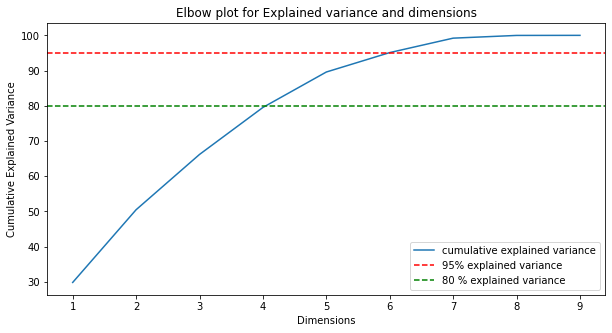

In [13]:
plt.figure(figsize=(10,5))
plt.plot(range(1,len(val)+1),val,label='cumulative explained variance')
plt.axhline(y=95,color='r',linestyle='--',label='95% explained variance')
plt.axhline(y=80,color='g',linestyle='--',label='80 % explained variance')
plt.title('Elbow plot for Explained variance and dimensions')
plt.xlabel('Dimensions')
plt.ylabel('Cumulative Explained Variance')
plt.legend()

In [14]:
pca=PCA(n_components=0.95)
pca.fit(sc_xtrain)
pca_xtrain=pca.transform(sc_xtrain)
pca_xtest=pca.transform(sc_xtest)

In [15]:
pca.n_components_

6